# EDA for Individuals

Description

In [1]:
# Reload the notebook if an external file is updated
%load_ext autoreload
%autoreload 2

import os
import sys

from pathlib import Path

path = (
    Path
    .cwd()
    .parent
    .parent
    .joinpath('warbler.py')
)

os.chdir(path)
sys.path.append(path)

In [2]:
import seaborn as sns

from constant import PROJECTION
from datatype.dataset import Dataset
from matplotlib import pyplot as plt

In [3]:
dataset = Dataset('segment')
dataframe = dataset.load()

In [4]:
folders = dataframe.folder.unique()

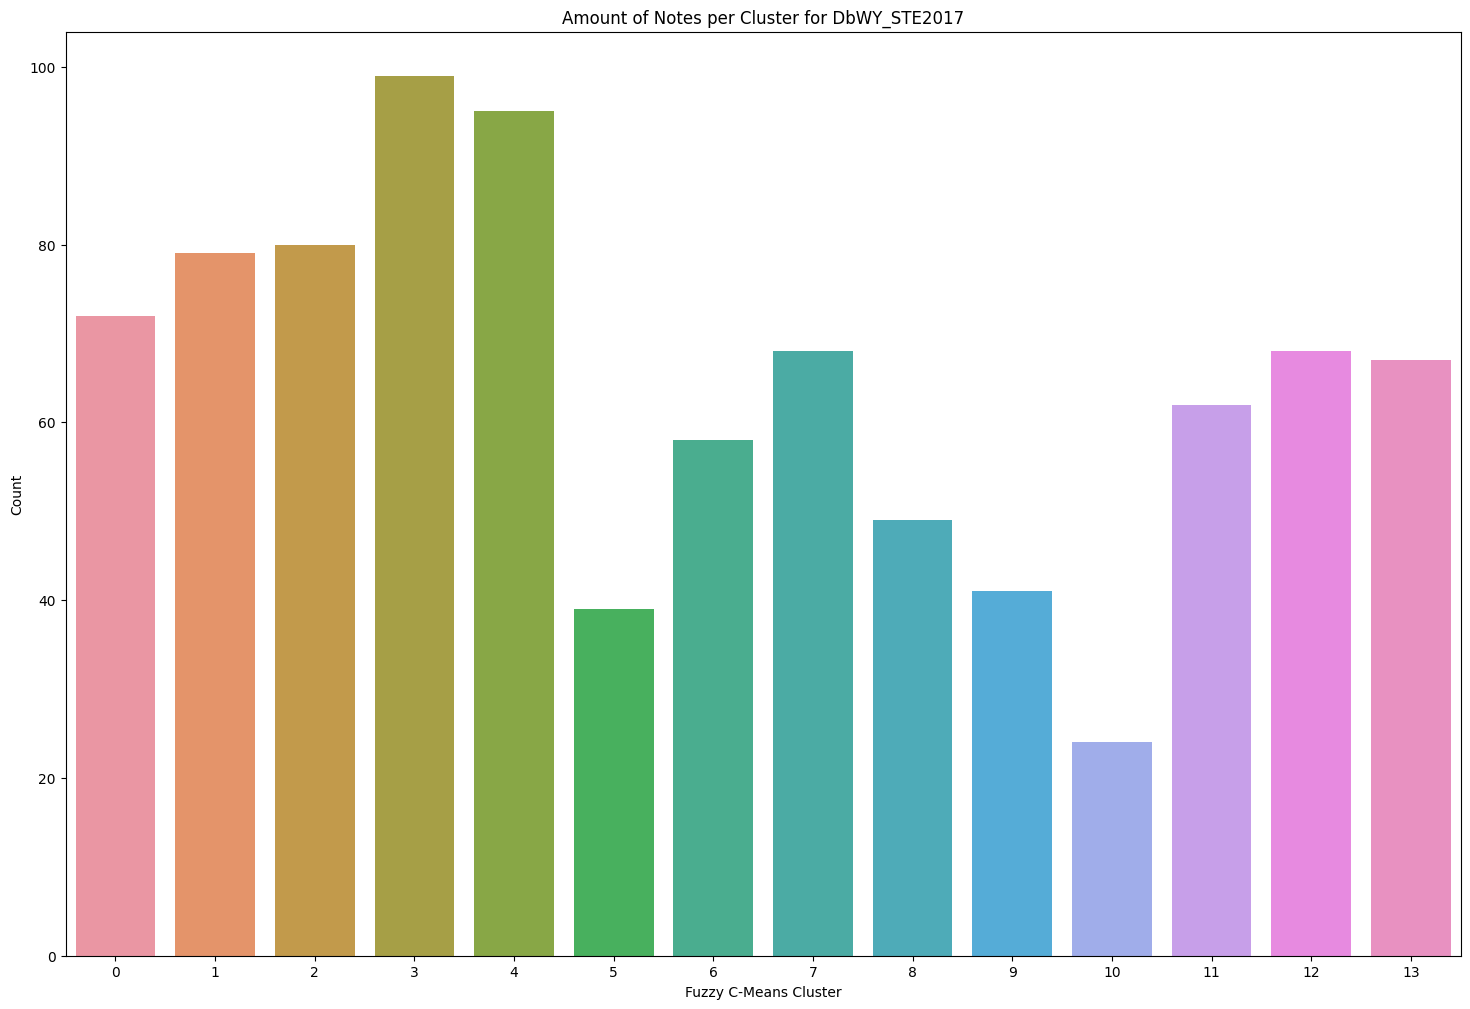

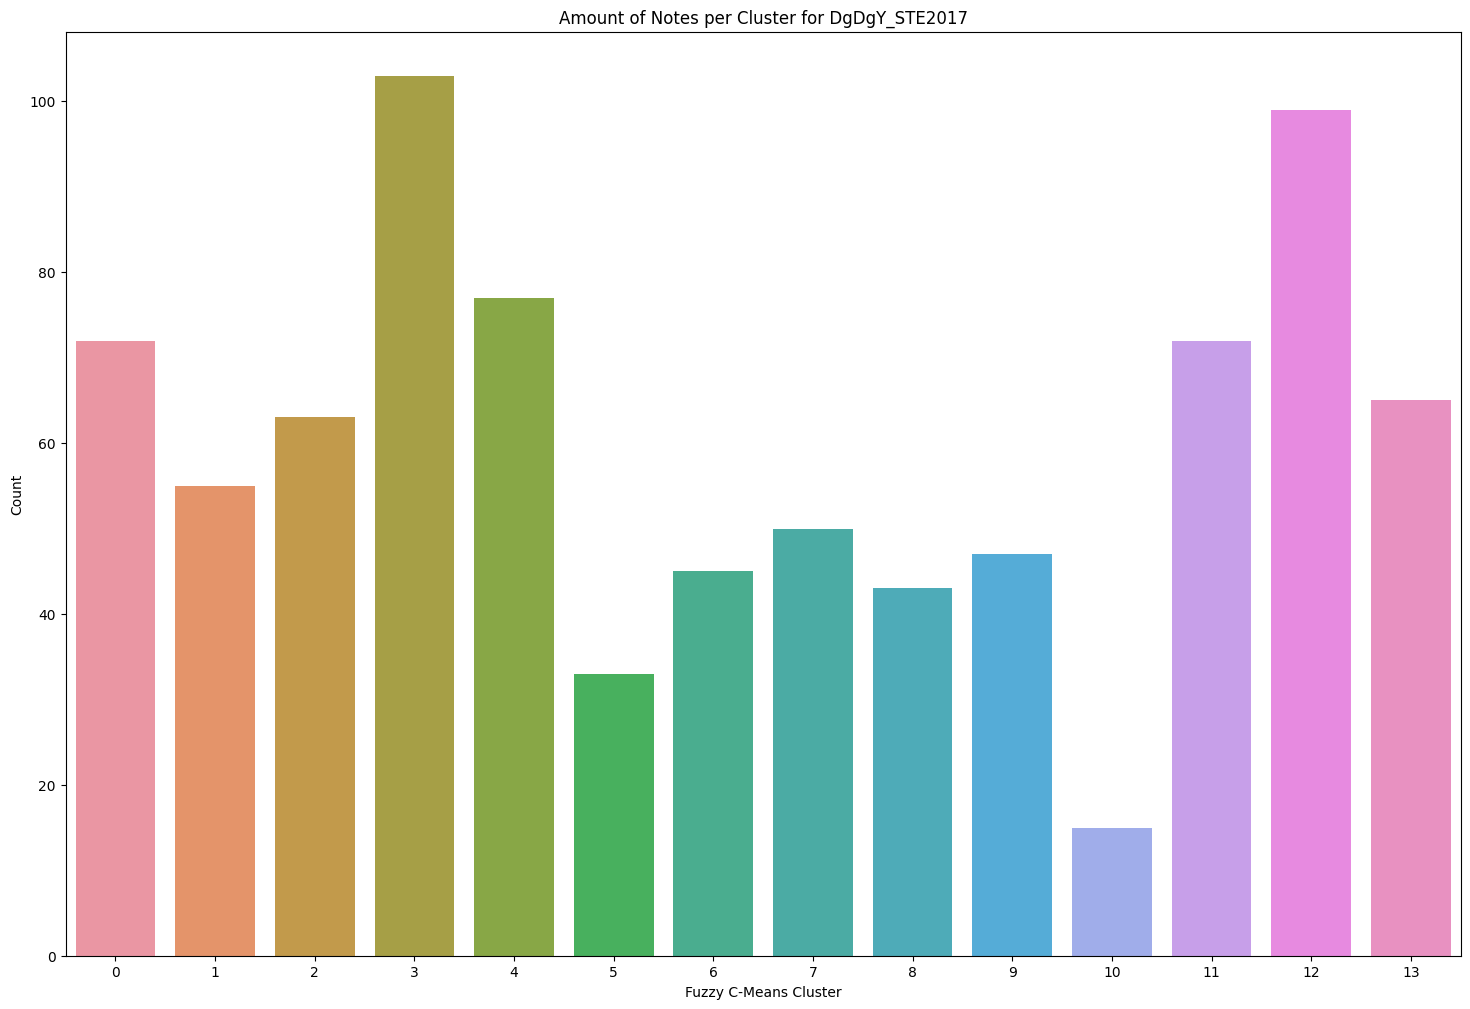

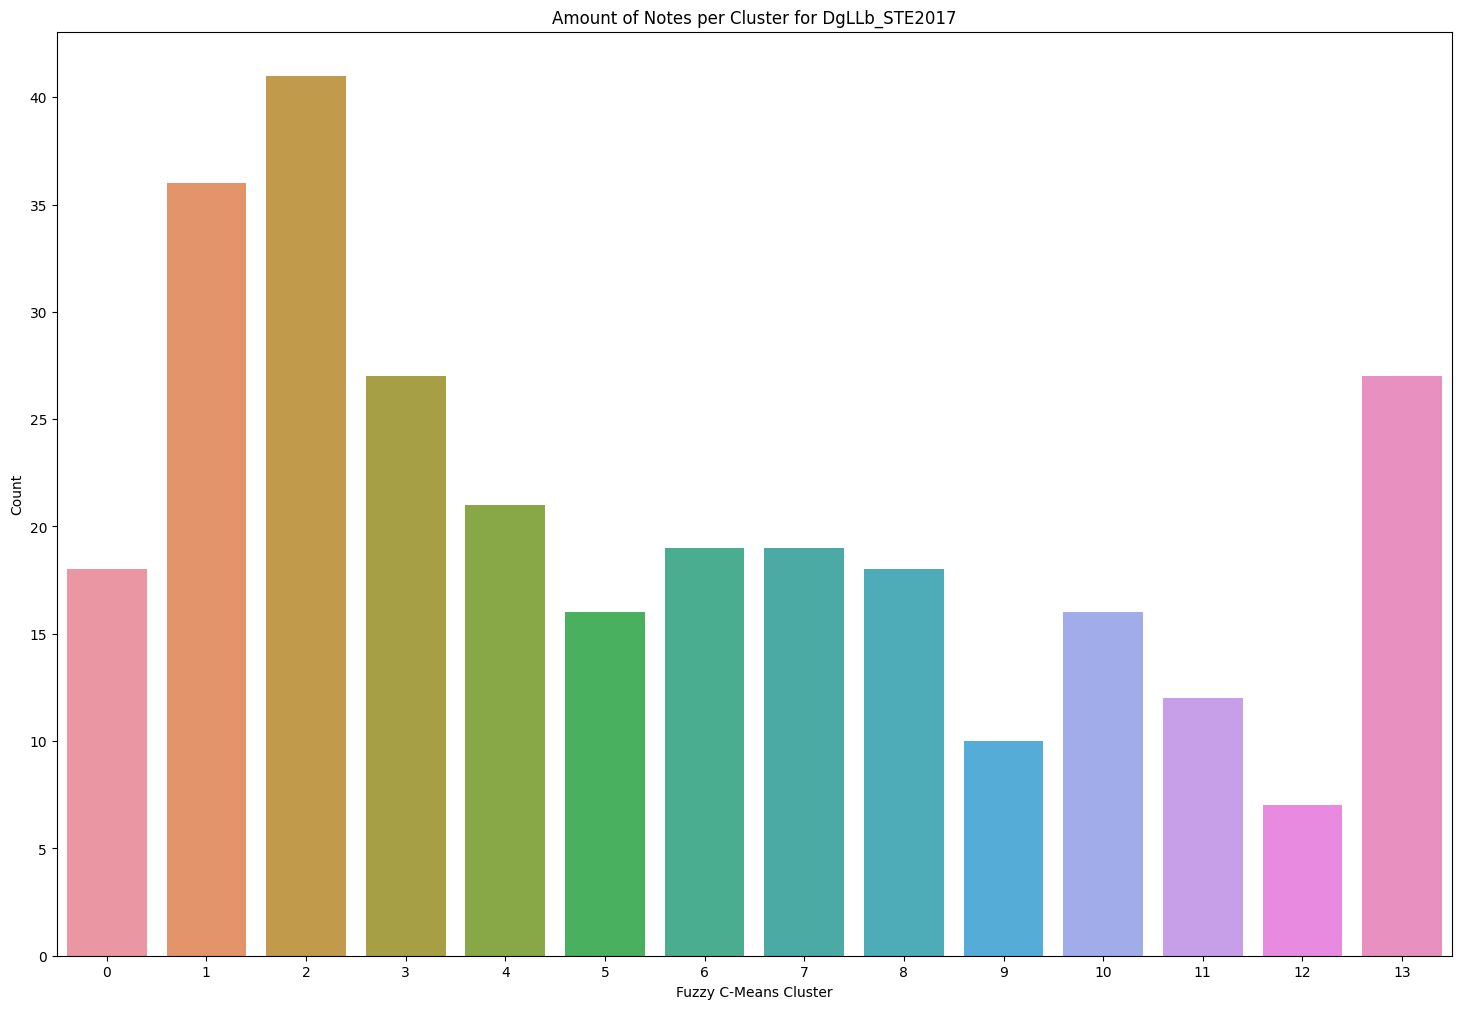

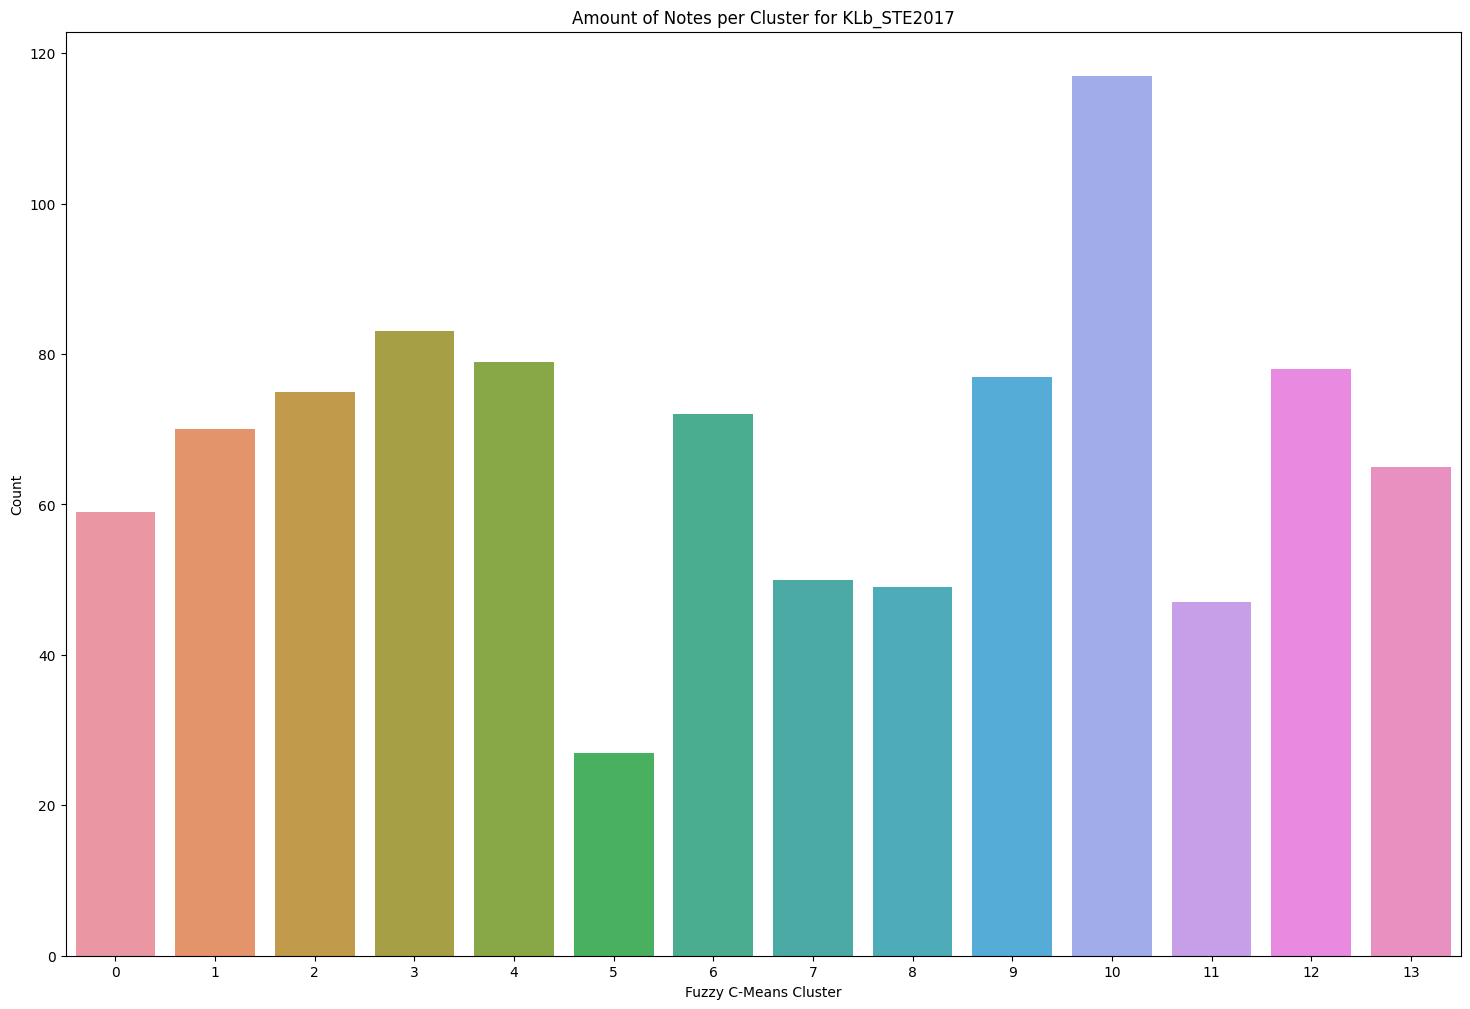

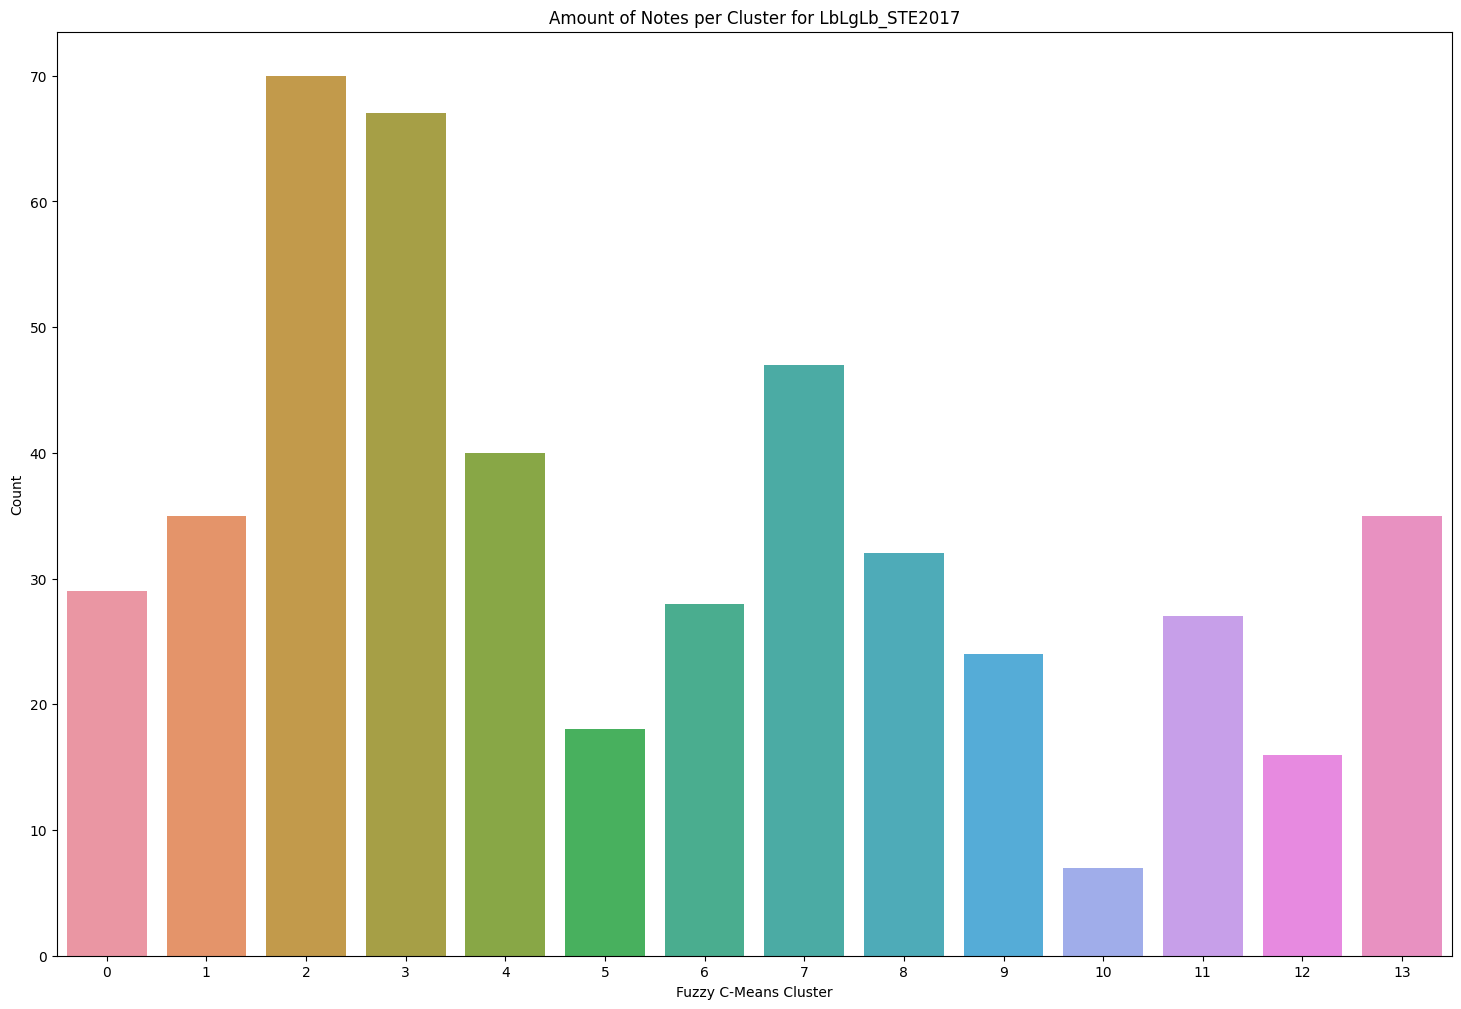

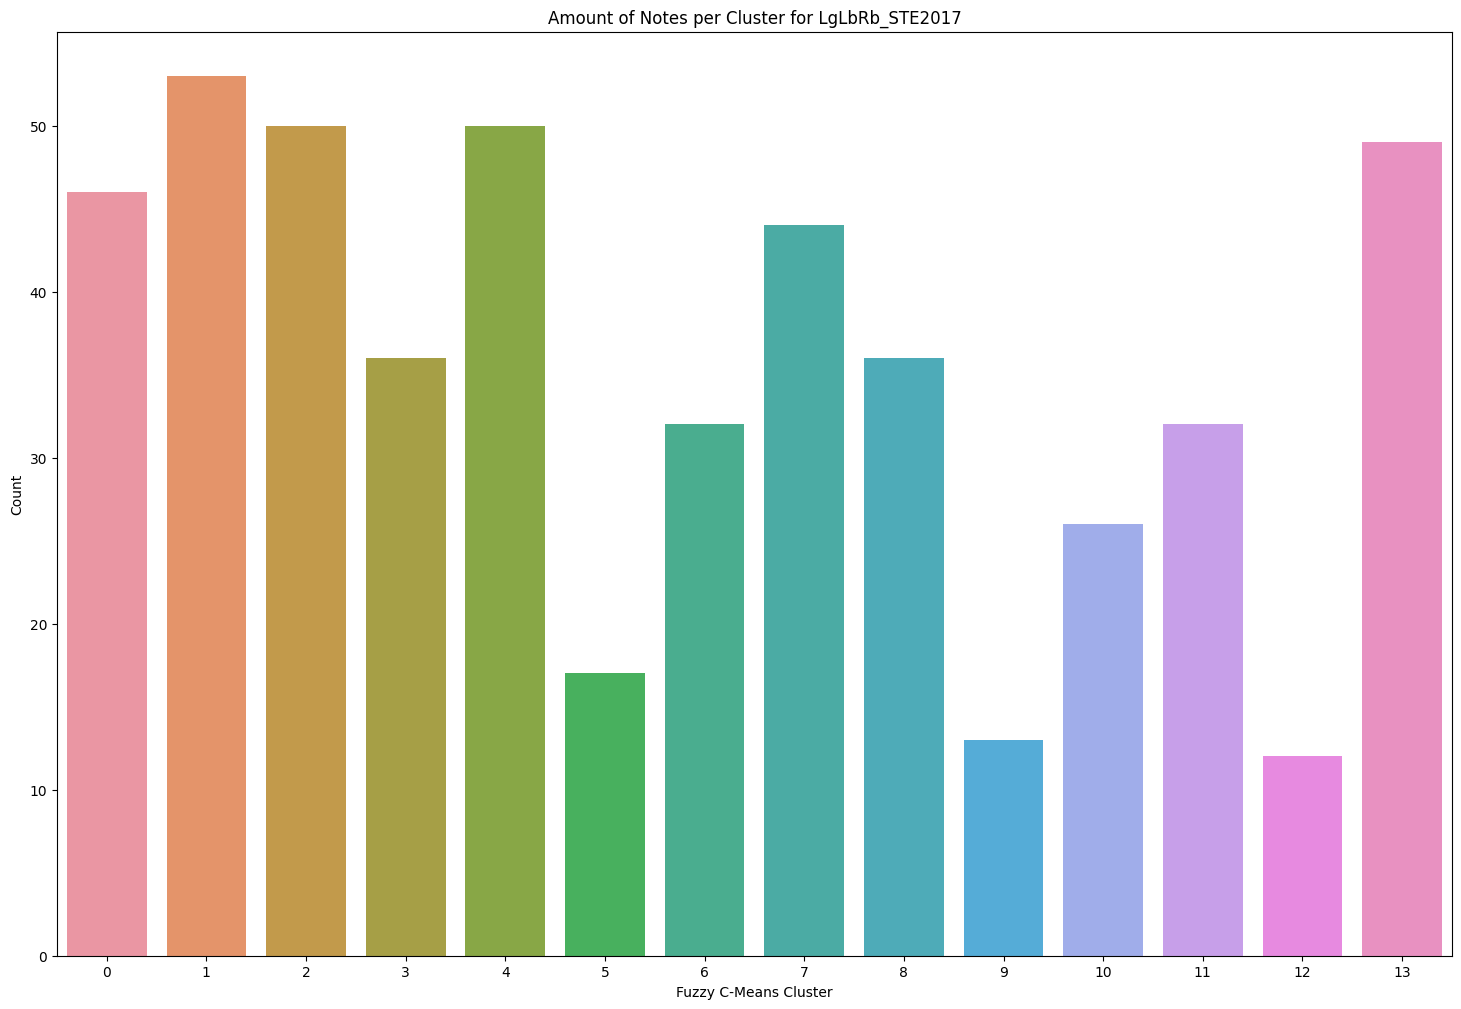

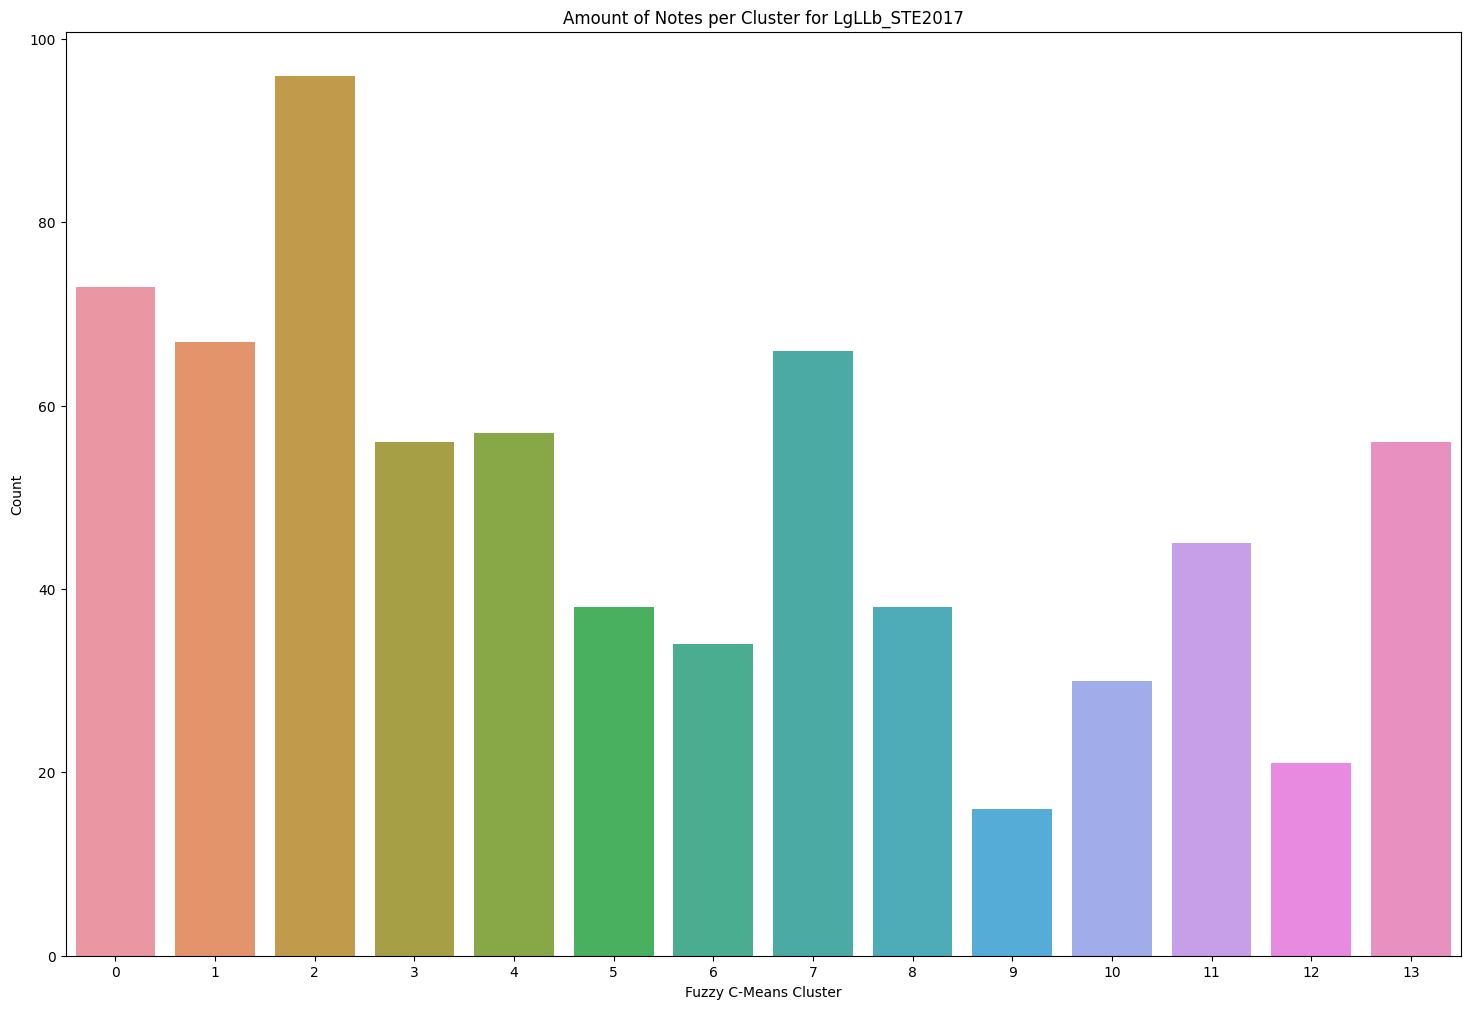

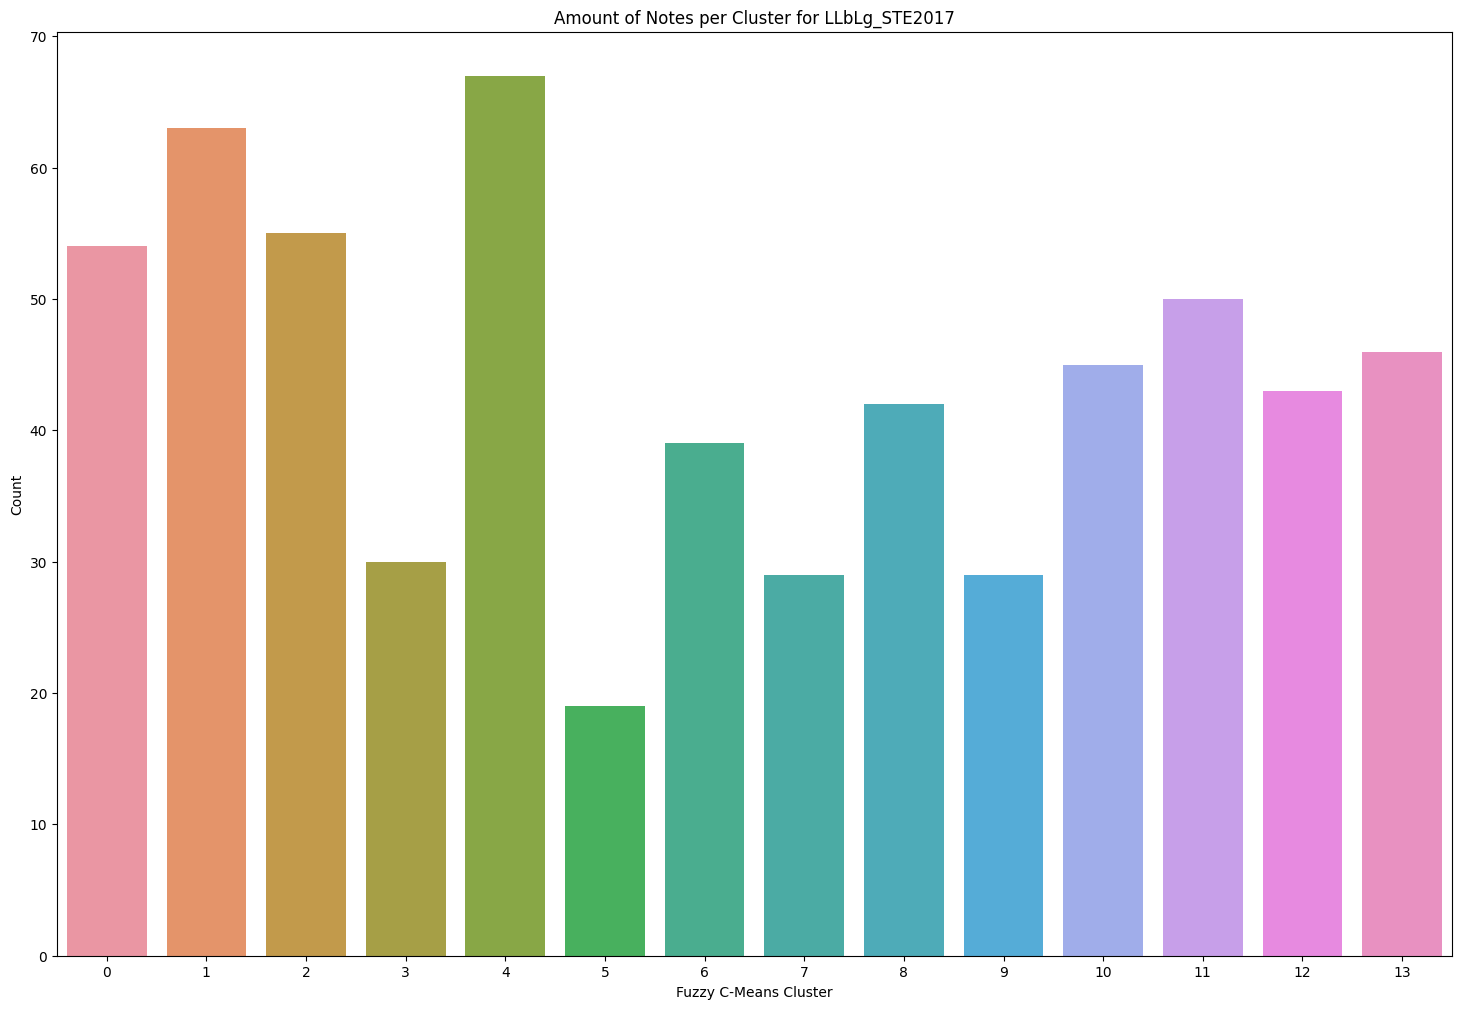

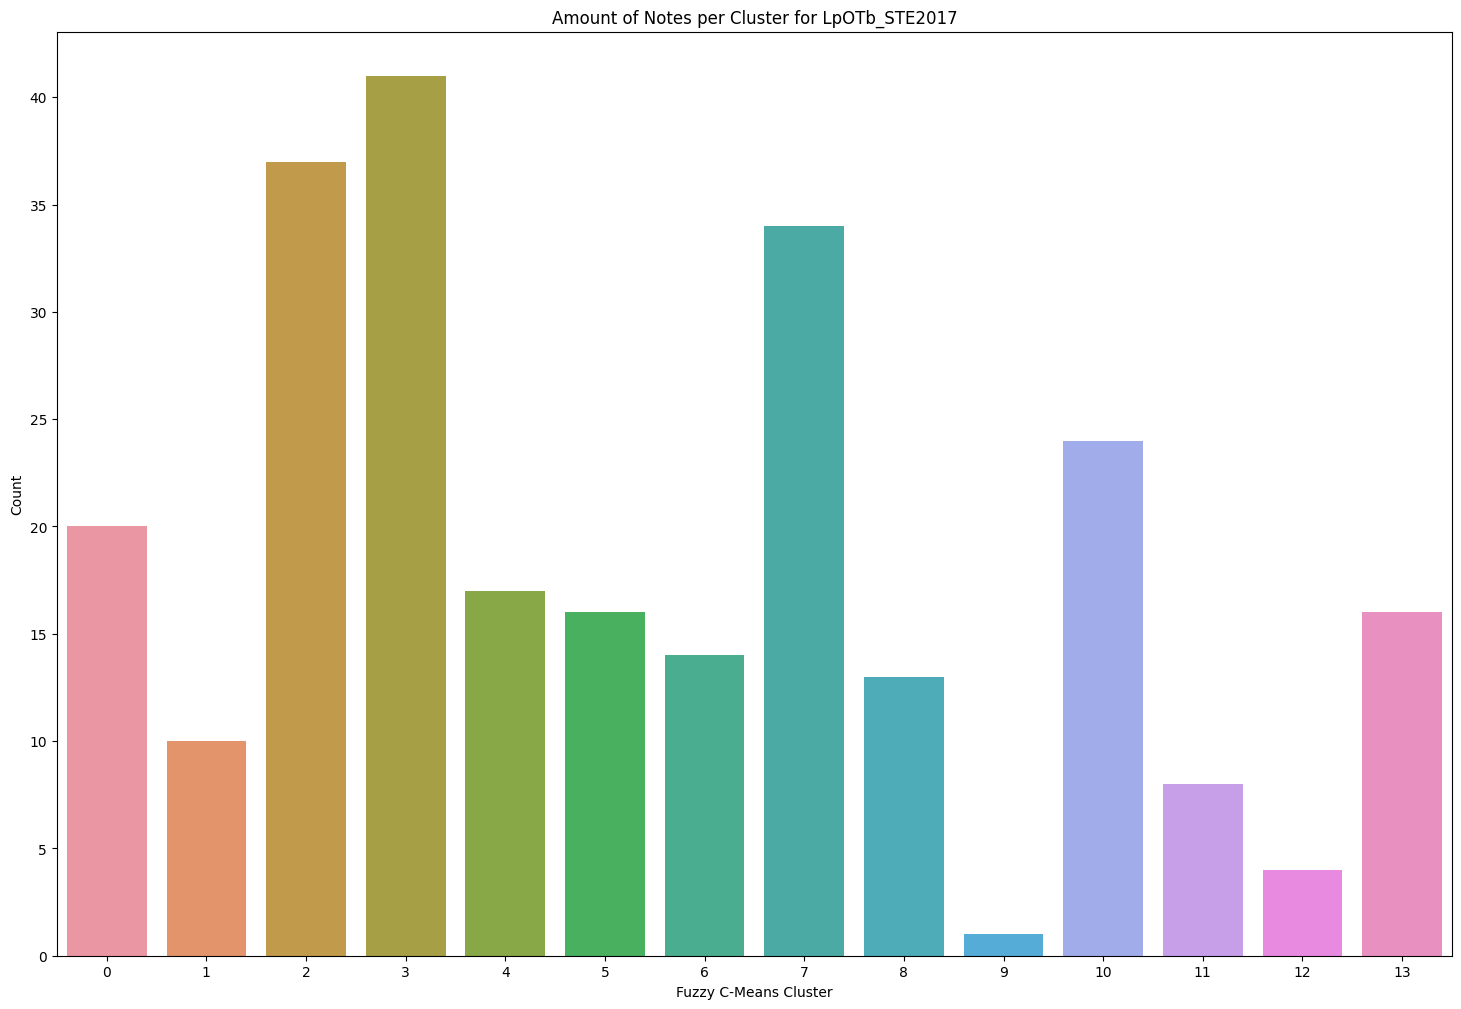

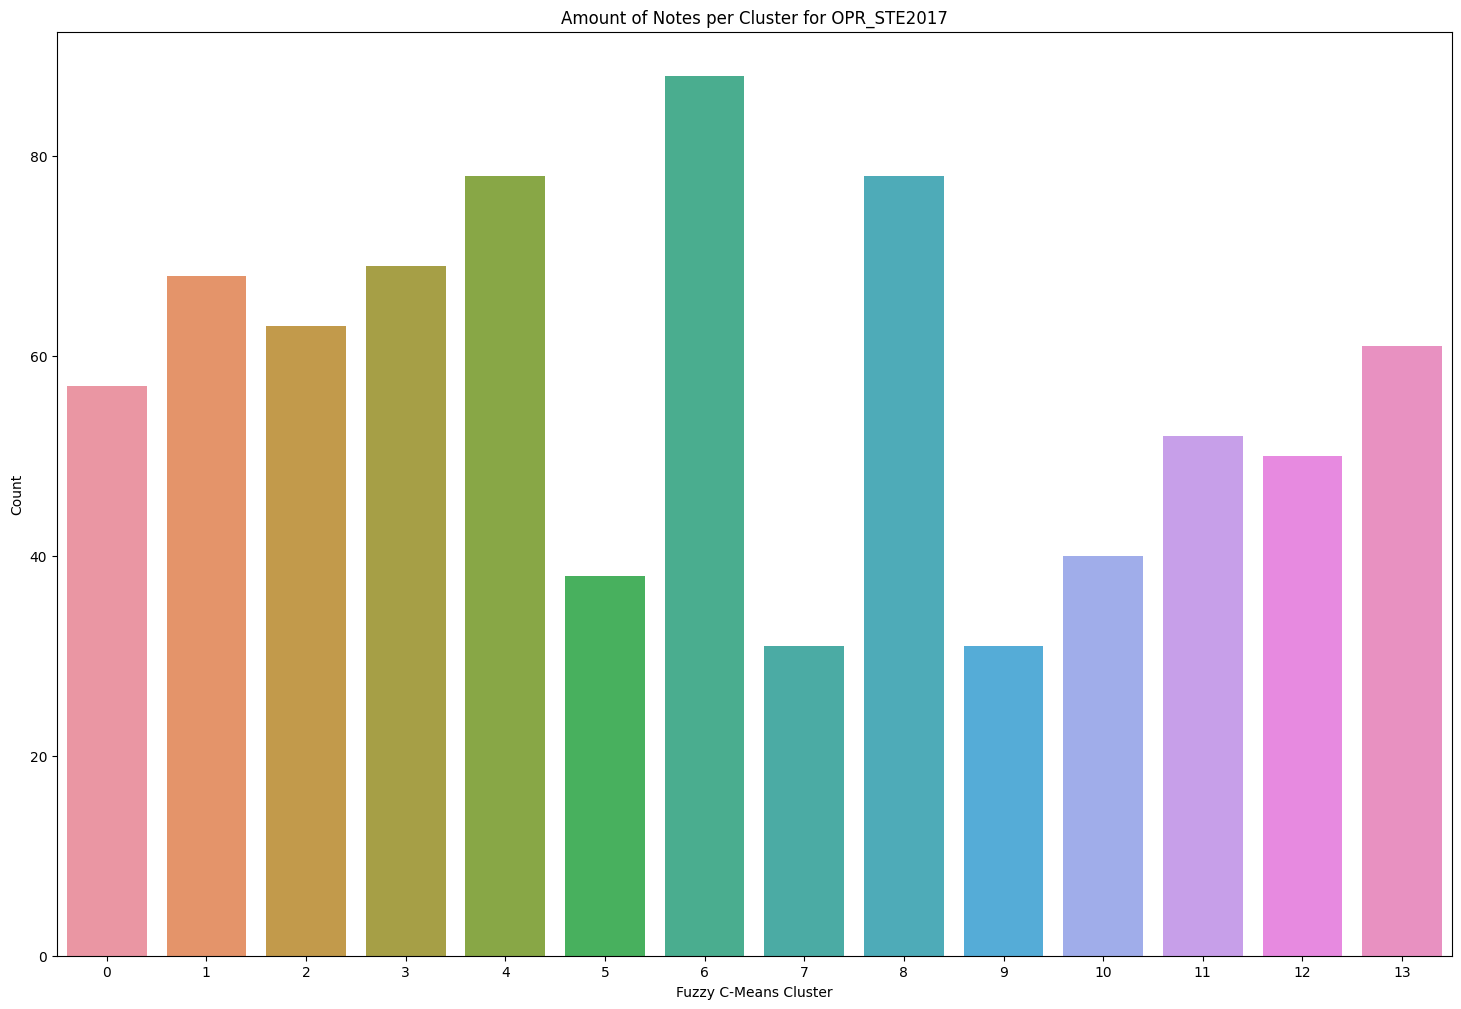

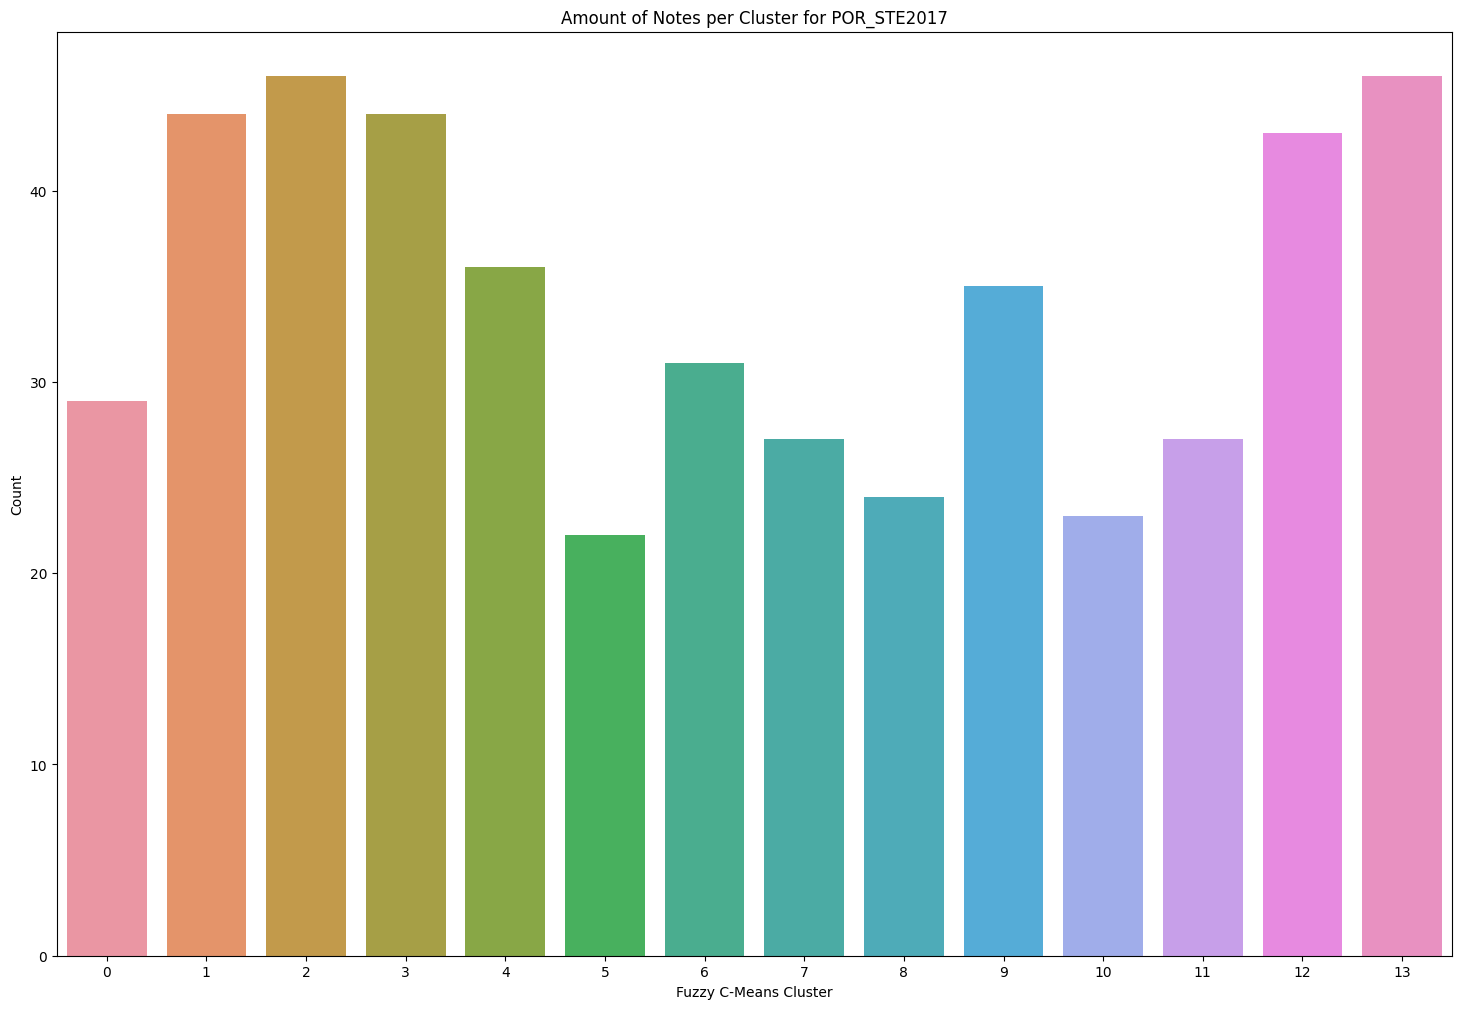

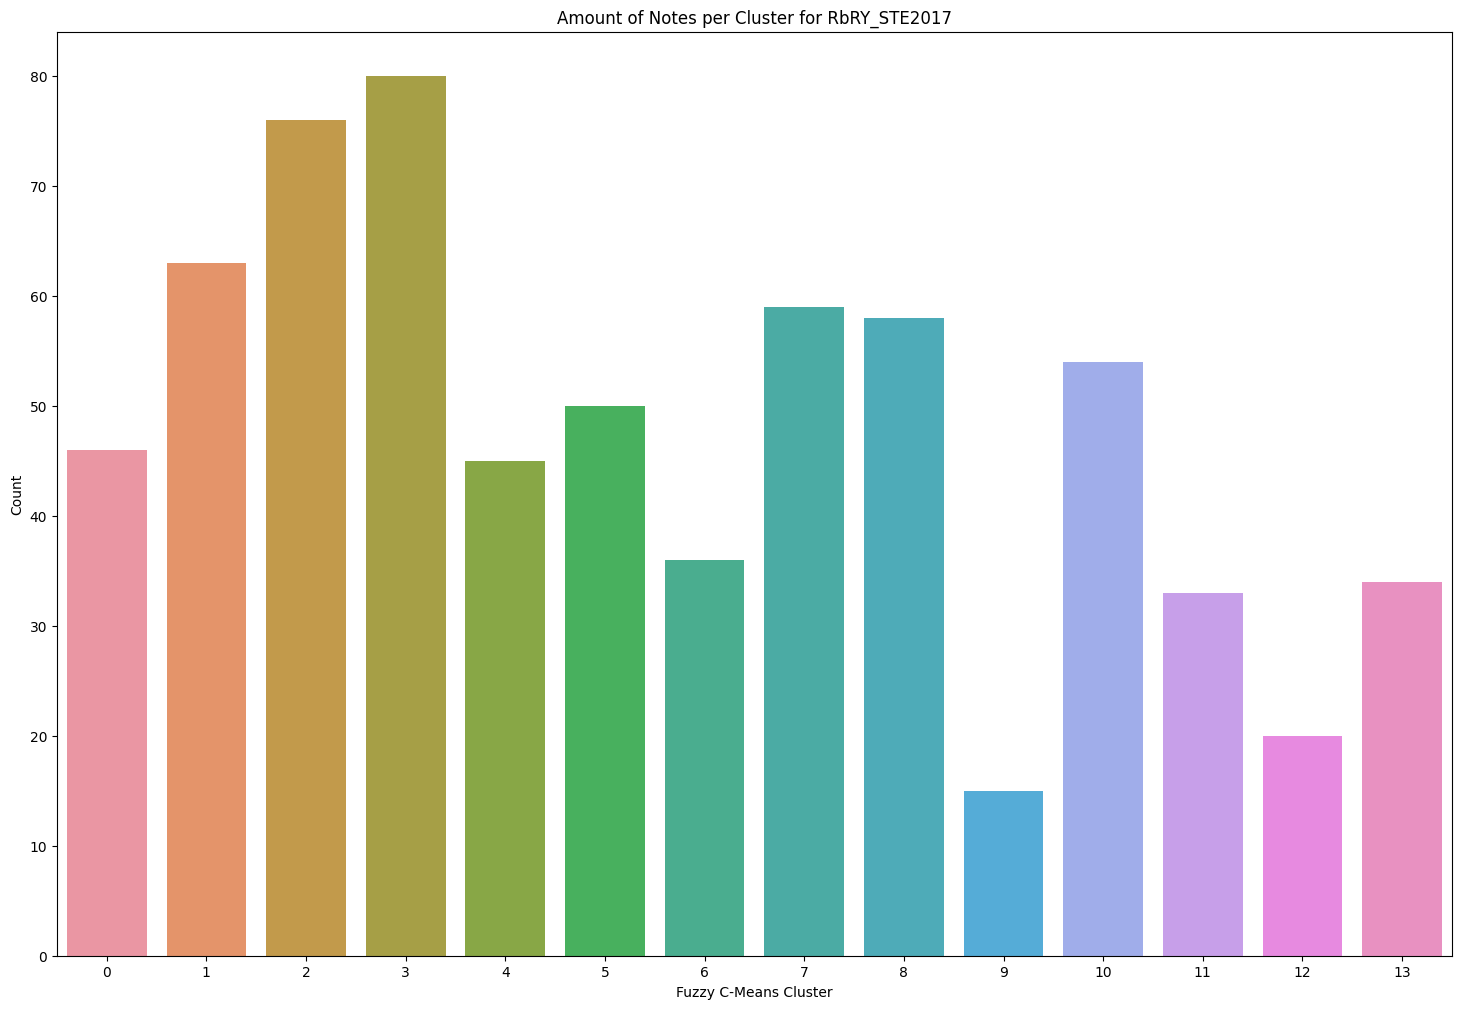

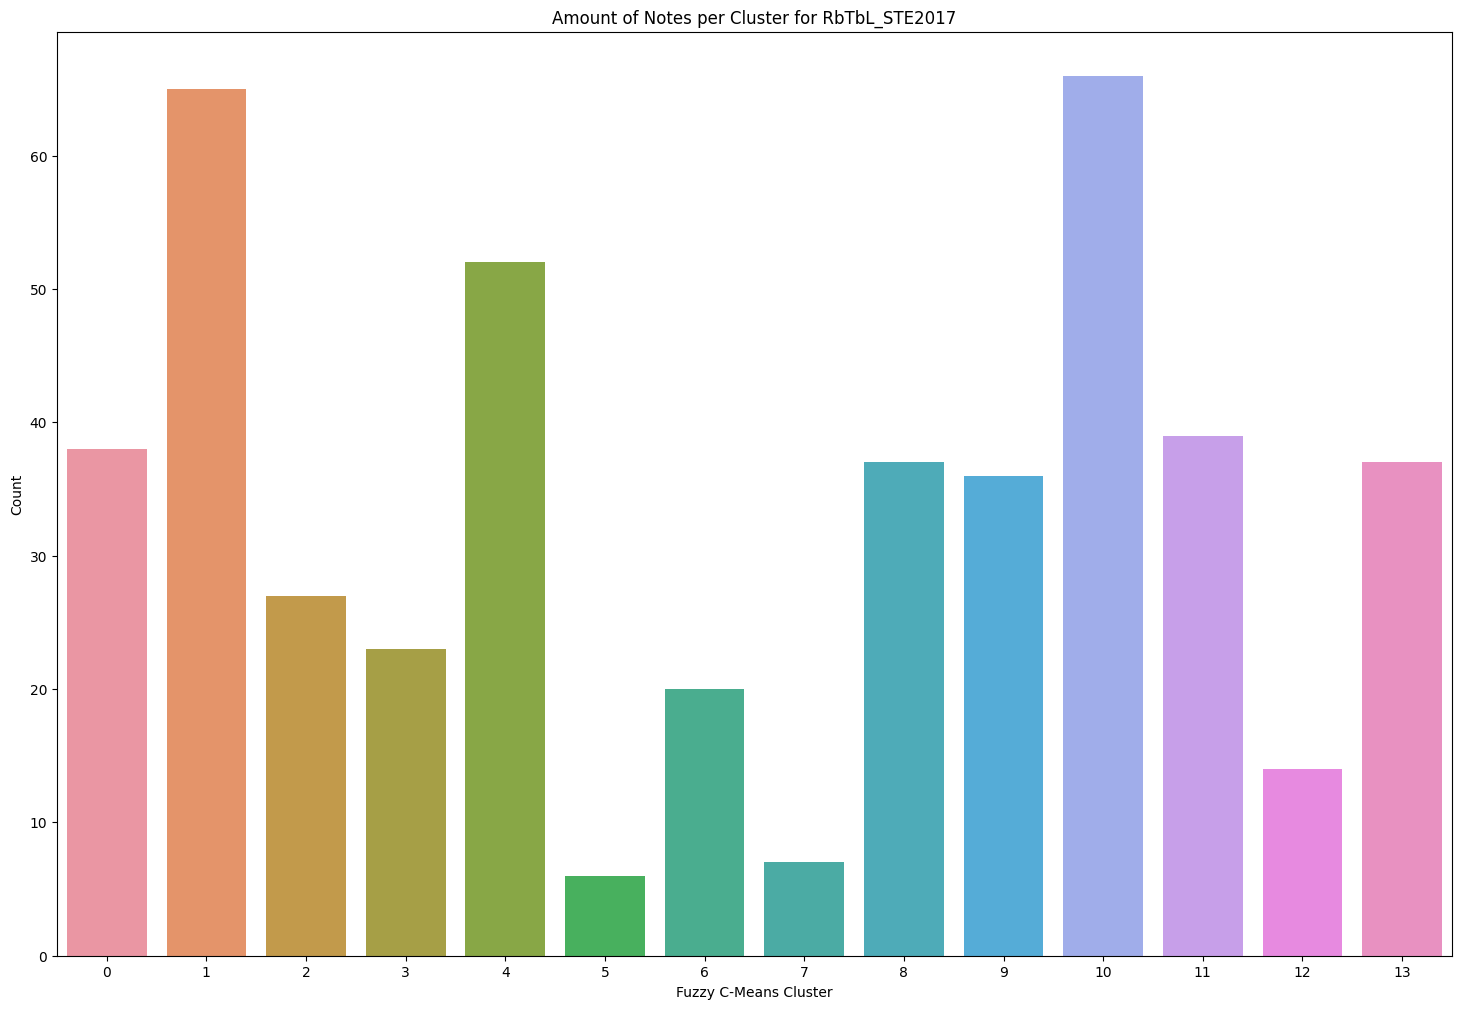

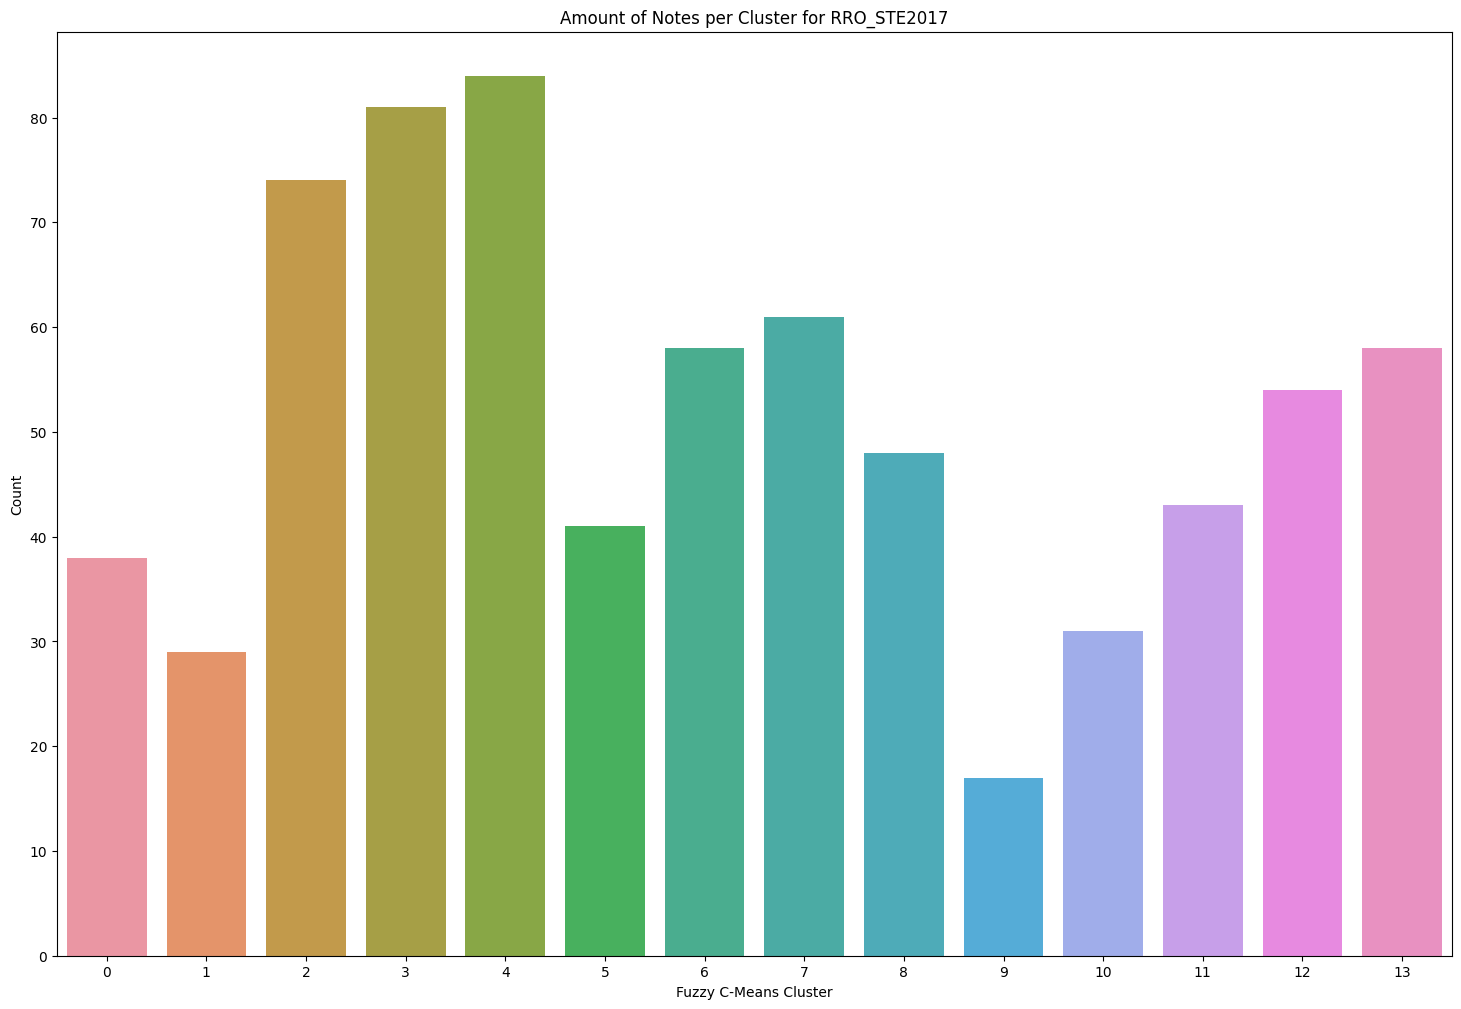

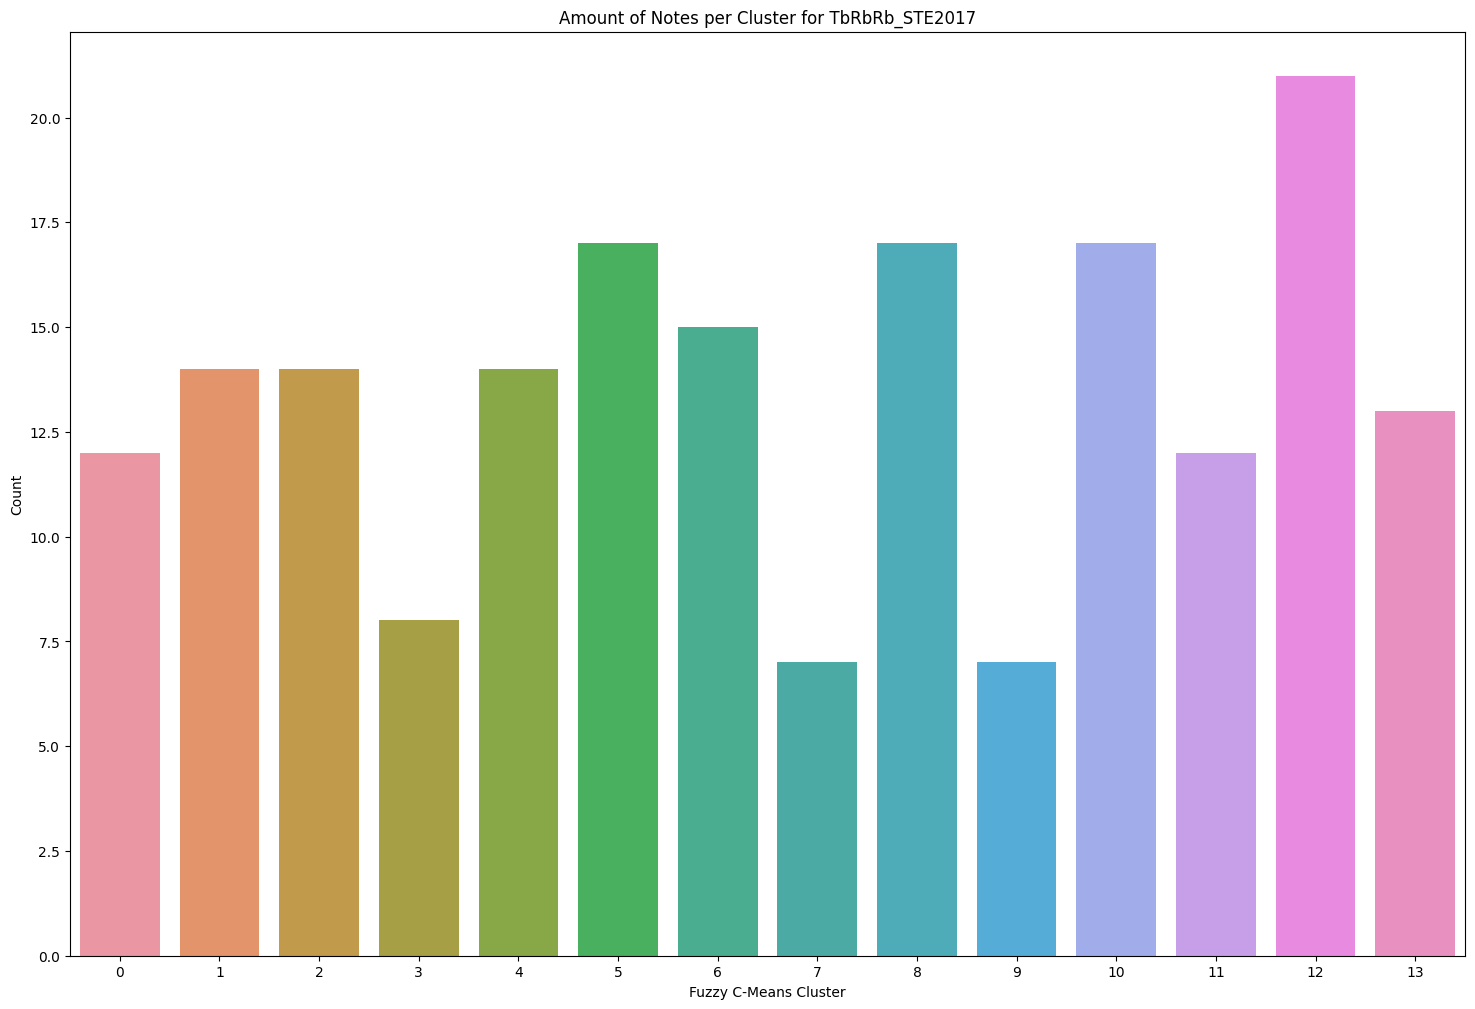

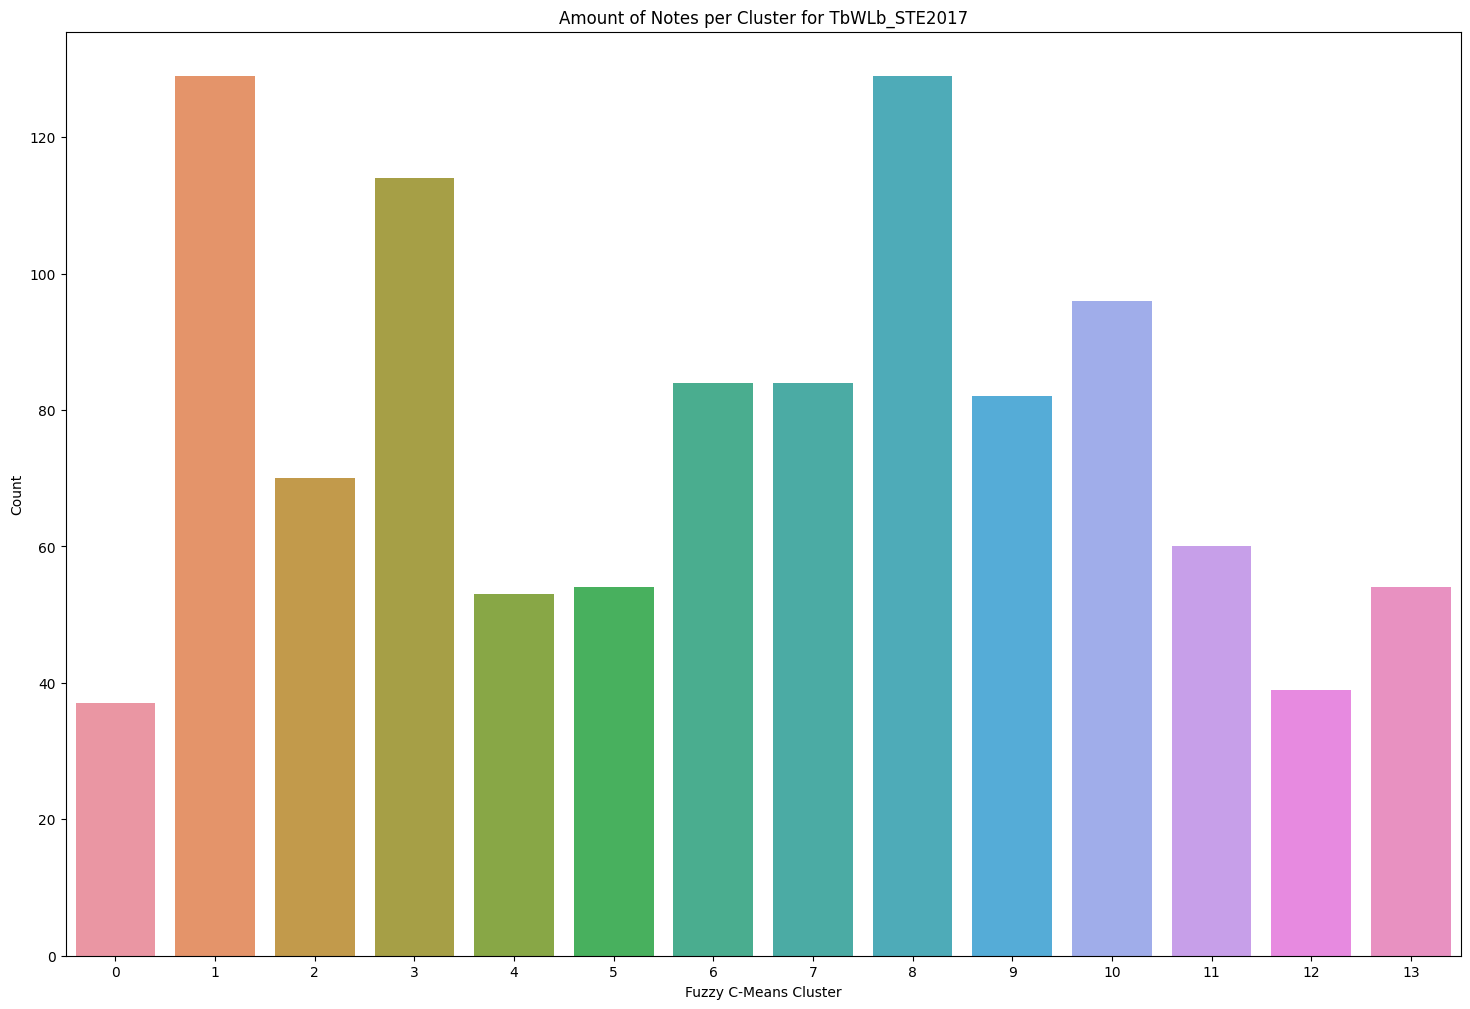

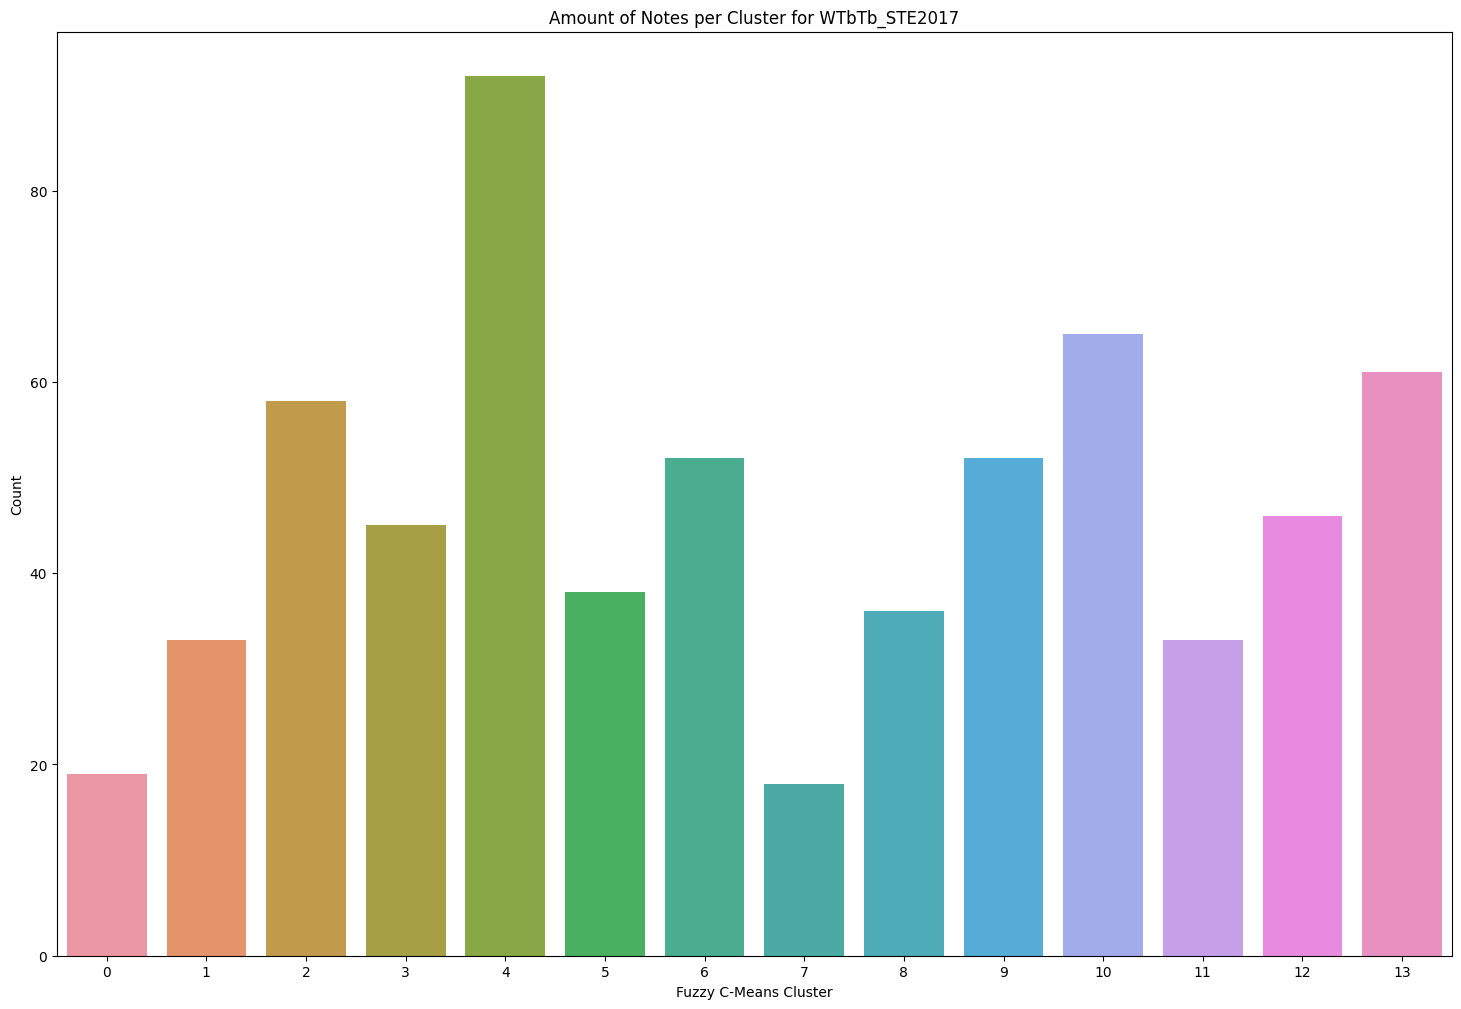

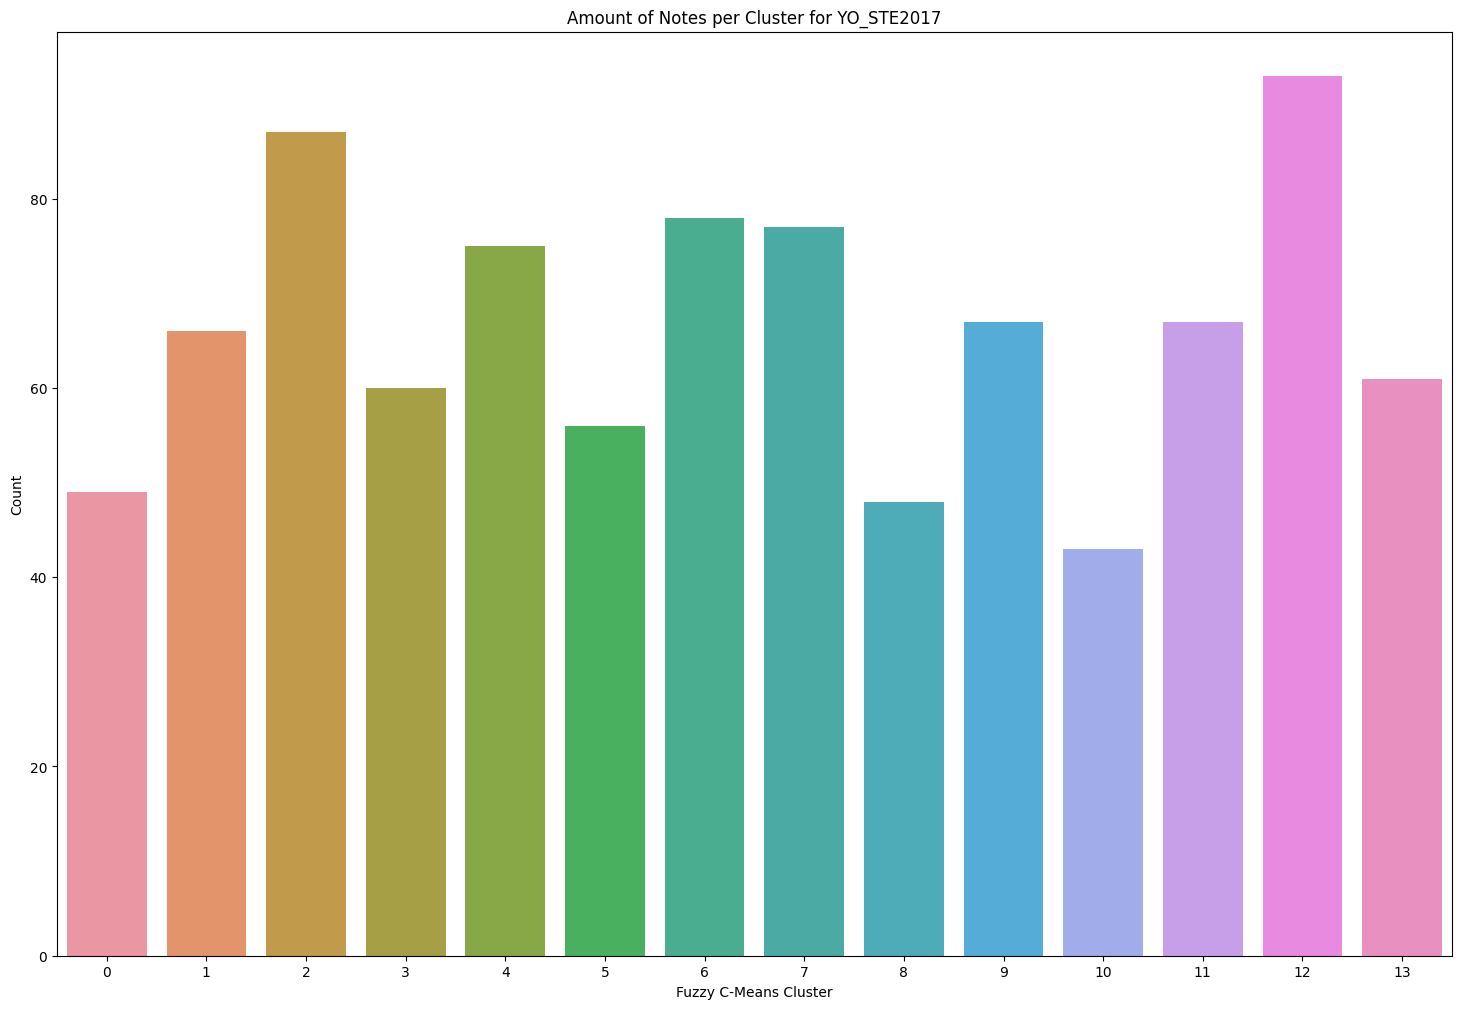

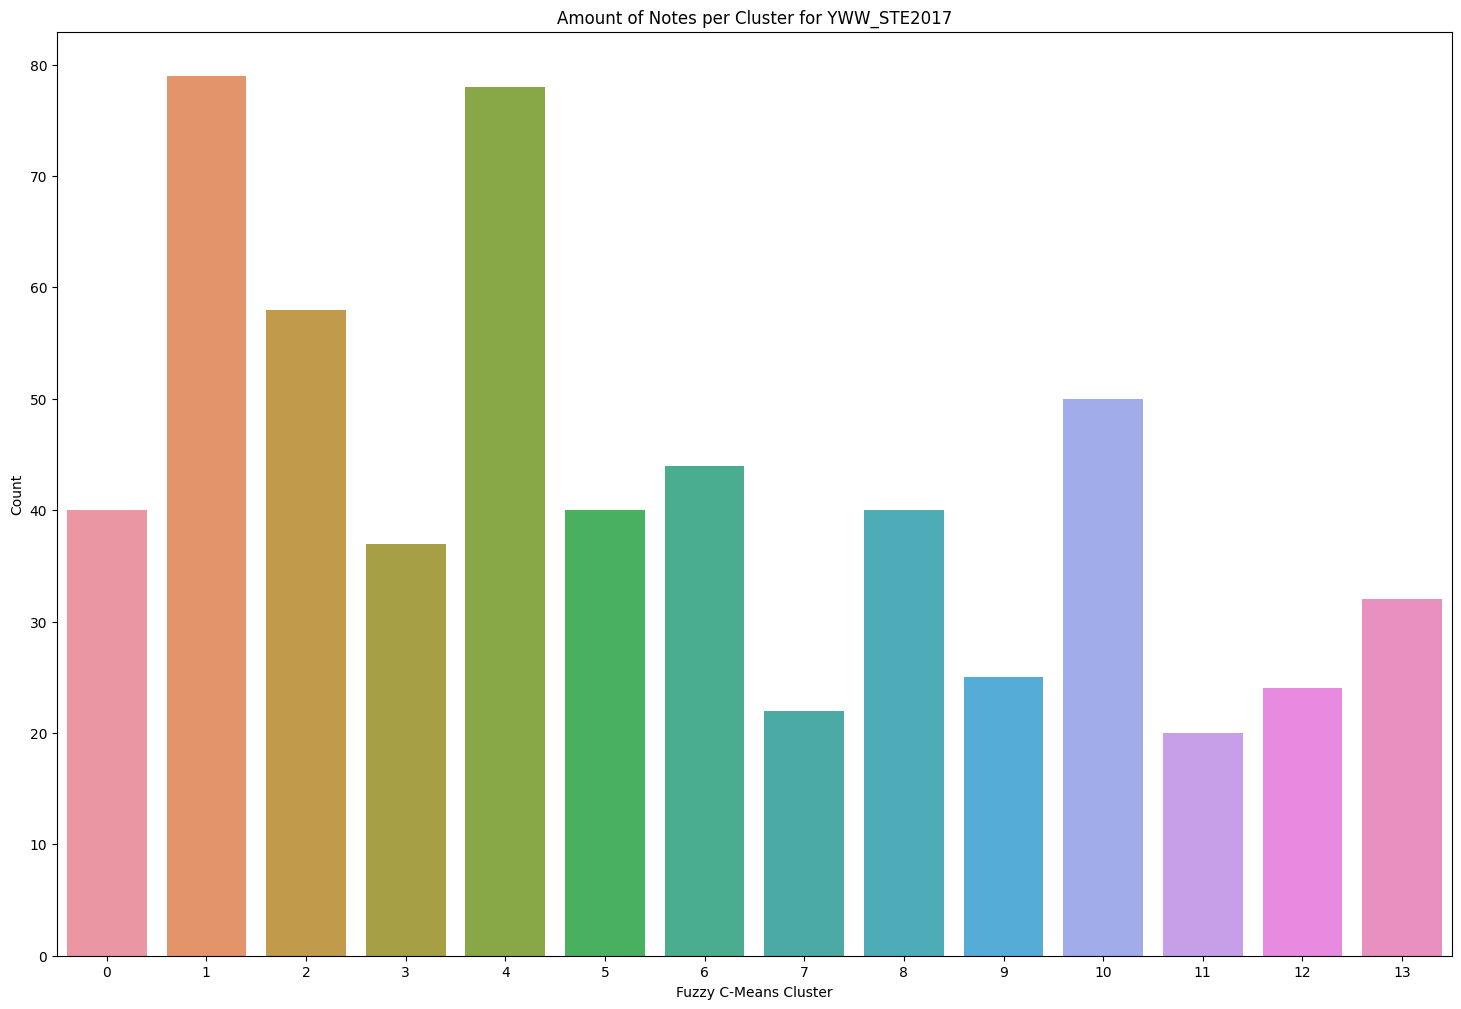

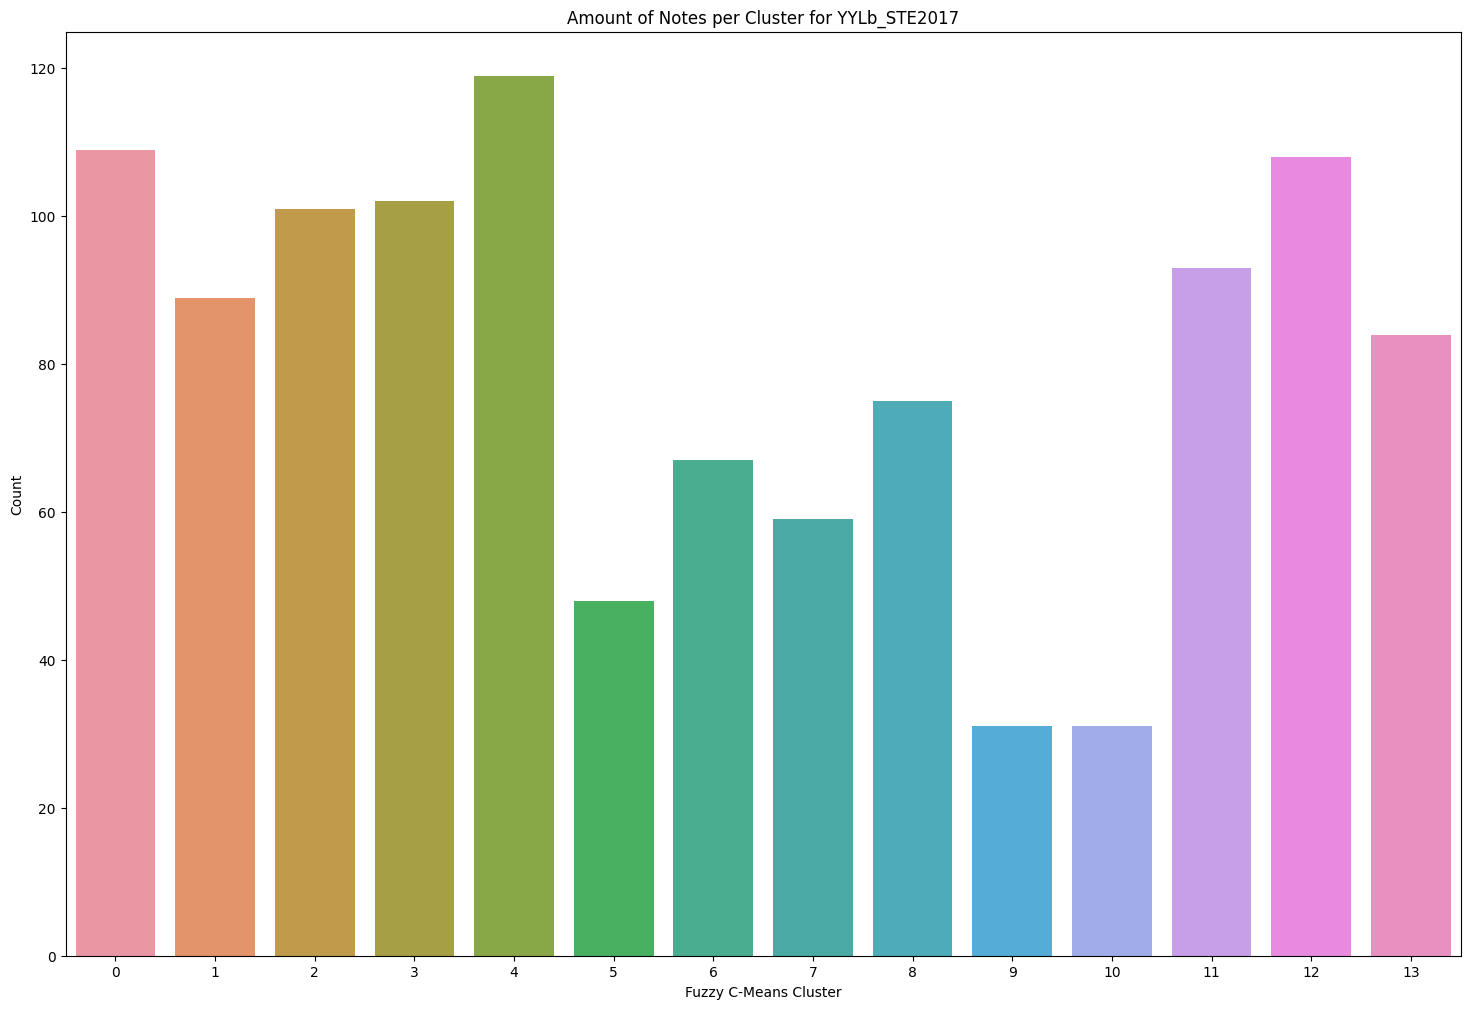

In [5]:
for folder in folders:
    subset = dataframe[dataframe.folder == folder]
    count = subset.fcm_label_2d.value_counts().sort_index()

    label = count.index.tolist()
    total = count.tolist()

    fig, ax = plt.subplots(
        figsize=(18, 12)
    )

    title = f"Amount of Notes per Cluster for {folder}"
    
    ax.set_title(title)
    ax.set_xlabel('Fuzzy C-Means Cluster')
    ax.set_ylabel('Count')
    
    sns.barplot(x=label, y=total, orient='v')
    
    filename = f"{folder}_notes_per_clustr.png"
    path = PROJECTION.joinpath(filename)
    
    plt.savefig(
        path,
        bbox_inches='tight',
        dpi=300,
        format='png'
    )
    
    plt.show()
    plt.close()